# Checks: 2023-040 CCM Forecast Output (series 15)

In [1]:
# module imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

PATH = r'J:\DataScience\Estimates&Forecasts\SR15 Forecast\SR15_CCM\CCM_OutputData\DataToEconTeam\DataToEconTeam08312023\Deliverables'

In [2]:
# raw data
household_char = pd.read_excel(PATH + r'\Household_ characteristics_2020_2060_08312023.xlsx',
                              sheet_name = 'data')
household_char

,year,race,sex,age,total_population,gq_pop,households,WithKids,AnySenior,HouseholderLF
0,2020,AIAN_NH,F,0,73,0,0,0,0,0
1,2020,AIAN_NH,F,1,55,0,0,0,0,0
2,2020,AIAN_NH,F,2,55,0,0,0,0,0
3,2020,AIAN_NH,F,3,74,0,0,0,0,0
4,2020,AIAN_NH,F,4,91,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
63709,2060,White_NH,M,106,7,0,5,0,5,0
63710,2060,White_NH,M,107,4,0,3,0,3,0
63711,2060,White_NH,M,108,2,0,1,0,1,0
63712,2060,White_NH,M,109,1,0,1,0,1,0


# 3. Households with kids comparable with age groups <18 

In [3]:
# Number of houesholds with kids
hh_w_kids = household_char[['year', 'race', 'WithKids']]\
                .groupby(['year', 'race'])\
                .sum()\
                .reset_index()\
                            
hh_w_kids

,year,race,WithKids
0,2020,AIAN_NH,1493
1,2020,Asian_NH,46498
2,2020,Black_NH,17839
3,2020,Hispanic,137396
4,2020,Multi-Race NH,16874
...,...,...,...
282,2060,Black_NH,17034
283,2060,Hispanic,145853
284,2060,Multi-Race NH,19856
285,2060,NHPI_NH,1770


In [4]:
# Number of kids in cohort
kids_pop = household_char[household_char['age']<18]\
                [['year', 'race', 'total_population', 'gq_pop']]\
                .groupby(['year', 'race'])\
                .sum()\
                .reset_index()
kids_pop

,year,race,total_population,gq_pop
0,2020,AIAN_NH,2622,16
1,2020,Asian_NH,74481,183
2,2020,Black_NH,31885,678
3,2020,Hispanic,336988,1411
4,2020,Multi-Race NH,67659,209
...,...,...,...,...
282,2060,Black_NH,29600,549
283,2060,Hispanic,237633,1080
284,2060,Multi-Race NH,69219,210
285,2060,NHPI_NH,2420,0


In [5]:
hh_kids = hh_w_kids.merge(kids_pop, how='outer', on=['year', 'race'])
hh_kids['hh_pop_kids'] = (hh_kids['total_population']-hh_kids['gq_pop'])
hh_kids['kids/hh'] = hh_kids['hh_pop_kids']/hh_kids['WithKids']
hh_kids.sort_values(['race', 'year']).to_excel('Version 5 Test 3 - Households with Kids.xlsx', index=False)
hh_kids.sort_values(['race', 'year'])

,year,race,WithKids,total_population,gq_pop,hh_pop_kids,kids/hh
0,2020,AIAN_NH,1493,2622,16,2606,1.745479
7,2021,AIAN_NH,1587,2542,17,2525,1.591052
14,2022,AIAN_NH,1648,2500,19,2481,1.505461
21,2023,AIAN_NH,1601,2451,16,2435,1.520924
28,2024,AIAN_NH,1645,2427,16,2411,1.465653
...,...,...,...,...,...,...,...
258,2056,White_NH,131069,193804,962,192842,1.471301
265,2057,White_NH,130658,193231,959,192272,1.471567
272,2058,White_NH,130216,192647,957,191690,1.472093
279,2059,White_NH,129799,192080,953,191127,1.472484


In [6]:
hh_kids.sort_values(['kids/hh'])

,year,race,WithKids,total_population,gq_pop,hh_pop_kids,kids/hh
266,2058,AIAN_NH,1698,1861,11,1850,1.089517
273,2059,AIAN_NH,1682,1847,11,1836,1.091558
280,2060,AIAN_NH,1667,1832,11,1821,1.092382
252,2056,AIAN_NH,1712,1901,12,1889,1.103388
259,2057,AIAN_NH,1691,1880,11,1869,1.105263
...,...,...,...,...,...,...,...
242,2054,Multi-Race NH,20097,70201,214,69987,3.482460
25,2023,Multi-Race NH,17281,61761,204,61557,3.562120
18,2022,Multi-Race NH,17170,61569,206,61363,3.573850
11,2021,Multi-Race NH,16980,64264,202,64062,3.772792


<AxesSubplot:xlabel='year'>

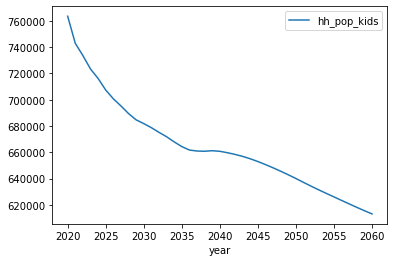

In [7]:
hh_kids[['year', 'hh_pop_kids']].groupby('year').sum().plot.line()

<AxesSubplot:xlabel='year'>

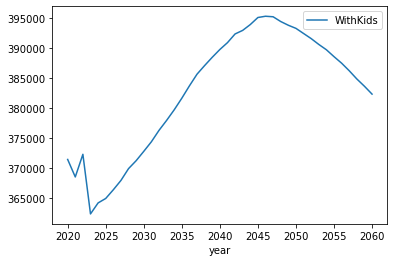

In [8]:
hh_kids[['year', 'WithKids']].groupby('year').sum().plot.line()

# 4. Households with senior comparable with age groups >= 65 

In [9]:
# Number of households with seniors
hh_w_senior = household_char[['year', 'race', 'AnySenior']]\
                .groupby(['year', 'race'])\
                .sum()\
                .reset_index()\
                            
hh_w_senior

,year,race,AnySenior
0,2020,AIAN_NH,1616
1,2020,Asian_NH,37616
2,2020,Black_NH,13282
3,2020,Hispanic,63294
4,2020,Multi-Race NH,7888
...,...,...,...
282,2060,Black_NH,15476
283,2060,Hispanic,137444
284,2060,Multi-Race NH,19808
285,2060,NHPI_NH,2480


In [10]:
# Number of seniors in cohort
senior_pop = household_char[household_char['age']>=65]\
                [['year', 'race', 'total_population', 'gq_pop']]\
                .groupby(['year', 'race'])\
                .sum()\
                .reset_index()
senior_pop

,year,race,total_population,gq_pop
0,2020,AIAN_NH,1892,60
1,2020,Asian_NH,63757,1377
2,2020,Black_NH,16294,1421
3,2020,Hispanic,86862,2330
4,2020,Multi-Race NH,8232,406
...,...,...,...,...
282,2060,Black_NH,19795,1926
283,2060,Hispanic,224266,7256
284,2060,Multi-Race NH,24435,1331
285,2060,NHPI_NH,4951,159


In [11]:
hh_senior = hh_w_senior.merge(senior_pop, how='outer', on=['year', 'race'])
hh_senior['hh_pop_senior'] = (hh_senior['total_population']-hh_senior['gq_pop'])
hh_senior['senior/hh'] = hh_senior['hh_pop_senior']/hh_senior['AnySenior']
hh_senior.sort_values(['race', 'year']).to_excel('Version 5 Test 4 - Households with senior.xlsx', index=False)
hh_senior.sort_values(['race', 'year'])

,year,race,AnySenior,total_population,gq_pop,hh_pop_senior,senior/hh
0,2020,AIAN_NH,1616,1892,60,1832,1.133663
7,2021,AIAN_NH,1773,1982,56,1926,1.086294
14,2022,AIAN_NH,1795,2110,71,2039,1.135933
21,2023,AIAN_NH,1867,2223,84,2139,1.145688
28,2024,AIAN_NH,1945,2325,72,2253,1.158355
...,...,...,...,...,...,...,...
258,2056,White_NH,252057,346069,11107,334962,1.328914
265,2057,White_NH,250892,344426,11042,333384,1.328795
272,2058,White_NH,249747,342846,10977,331869,1.328821
279,2059,White_NH,248626,341340,10911,330429,1.329020


<AxesSubplot:xlabel='year'>

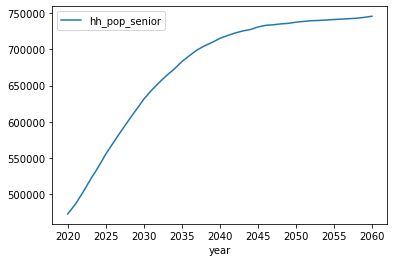

In [12]:
hh_senior[['year', 'hh_pop_senior']].groupby('year').sum().plot.line()

<AxesSubplot:xlabel='year'>

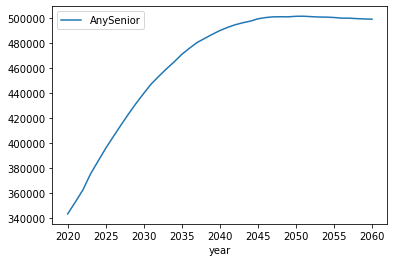

In [13]:
hh_senior[['year', 'AnySenior']].groupby('year').sum().plot.line()

# 5. No households with householder age <15

Pass. No findings.

In [14]:
# age characteristics
age = household_char.groupby(['year', 'age']).sum().reset_index()
age['num_householders'] = age['households']
age['household_pop'] = age['total_population']-age['gq_pop']
age['headship_rate'] = (age['household_pop']/age['num_householders'])*100
age

,year,age,total_population,gq_pop,households,WithKids,AnySenior,HouseholderLF,num_householders,household_pop,headship_rate
0,2020,0,38519,0,0,0,0,0,0,38519,inf
1,2020,1,39536,2,0,0,0,0,0,39534,inf
2,2020,2,41869,0,0,0,0,0,0,41869,inf
3,2020,3,43136,2,0,0,0,0,0,43134,inf
4,2020,4,43893,13,0,0,0,0,0,43880,inf
...,...,...,...,...,...,...,...,...,...,...,...
4546,2060,106,56,1,31,0,31,0,31,55,177.419355
4547,2060,107,31,0,17,0,17,0,17,31,182.352941
4548,2060,108,16,0,7,0,7,0,7,16,228.571429
4549,2060,109,8,0,4,0,4,0,4,8,200.000000


In [15]:
age[(age['age']<15) & (age['num_householders']>0)]

,year,age,total_population,gq_pop,households,WithKids,AnySenior,HouseholderLF,num_householders,household_pop,headship_rate


# 6. No householder in LF has age less than 15 years
Pass. No findings.

In [16]:
age[(age['HouseholderLF']>0) & (age['age']<15)]

,year,age,total_population,gq_pop,households,WithKids,AnySenior,HouseholderLF,num_householders,household_pop,headship_rate


# 12. Households with and without children  

Compare forecast and distribution with version 4

In [17]:
v4 = pd.read_excel(r'C:\Users\jchu\OneDrive - San Diego Association of Governments\Projects\2023\2023-040 CCM Forecast Output (series 15)\Data\Version 4\Household_ characteristics_2020_2060_07272023.xlsx',
                 sheet_name = 'data')
v4

,year,race,sex,age,control_pop,gq_pop,households,WithKids,AnySenior,HouseholderLF
0,2020,AIAN_NH,F,0,73,0,0,0,0,0
1,2020,AIAN_NH,F,1,55,0,0,0,0,0
2,2020,AIAN_NH,F,2,55,0,0,0,0,0
3,2020,AIAN_NH,F,3,74,0,0,0,0,0
4,2020,AIAN_NH,F,4,91,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
63709,2060,White_NH,M,106,7,0,5,0,5,0
63710,2060,White_NH,M,107,4,0,3,0,3,0
63711,2060,White_NH,M,108,2,0,1,0,1,0
63712,2060,White_NH,M,109,1,0,1,0,1,0


In [18]:
# v4 kids distribution
v4_kids = v4[['year', 'WithKids', 'race', 'households']]\
            .groupby(['year', 'race'])\
            .sum()\
            .reset_index()
v4_kids['WithoutKids'] = v4_kids['households'] - v4_kids['WithKids']
v4_kids['WithKidsPct'] = (v4_kids['WithKids']/v4_kids['households'])*100
v4_kids['WithoutKidsPct'] = (v4_kids['WithoutKids']/v4_kids['households'])*100
v4_kids

,year,race,WithKids,households,WithoutKids,WithKidsPct,WithoutKidsPct
0,2020,AIAN_NH,1493,4583,3090,32.576915,67.423085
1,2020,Asian_NH,46498,129286,82788,35.965224,64.034776
2,2020,Black_NH,17839,54617,36778,32.661992,67.338008
3,2020,Hispanic,137396,298604,161208,46.012779,53.987221
4,2020,Multi-Race NH,16874,43912,27038,38.426854,61.573146
...,...,...,...,...,...,...,...
282,2060,Black_NH,17034,54455,37421,31.280874,68.719126
283,2060,Hispanic,145853,392122,246269,37.195822,62.804178
284,2060,Multi-Race NH,19856,63839,43983,31.103244,68.896756
285,2060,NHPI_NH,1770,5521,3751,32.059410,67.940590


In [19]:
# v5 kids distribution
v5_kids = household_char[['year', 'WithKids', 'race', 'households']]\
            .groupby(['year', 'race'])\
            .sum()\
            .reset_index()
v5_kids['WithoutKids'] = v5_kids['households'] - v5_kids['WithKids']
v5_kids['WithKidsPct'] = (v5_kids['WithKids']/v5_kids['households'])*100
v5_kids['WithoutKidsPct'] = (v5_kids['WithoutKids']/v5_kids['households'])*100
v5_kids

,year,race,WithKids,households,WithoutKids,WithKidsPct,WithoutKidsPct
0,2020,AIAN_NH,1493,4583,3090,32.576915,67.423085
1,2020,Asian_NH,46498,129286,82788,35.965224,64.034776
2,2020,Black_NH,17839,54617,36778,32.661992,67.338008
3,2020,Hispanic,137396,298604,161208,46.012779,53.987221
4,2020,Multi-Race NH,16874,43912,27038,38.426854,61.573146
...,...,...,...,...,...,...,...
282,2060,Black_NH,17034,54455,37421,31.280874,68.719126
283,2060,Hispanic,145853,392122,246269,37.195822,62.804178
284,2060,Multi-Race NH,19856,63839,43983,31.103244,68.896756
285,2060,NHPI_NH,1770,5521,3751,32.059410,67.940590


In [20]:
v5_v4_diff = (v5_kids.set_index(['year', 'race'])-v4_kids.set_index(['year', 'race'])).reset_index()
v5_v4_diff

,year,race,WithKids,households,WithoutKids,WithKidsPct,WithoutKidsPct
0,2020,AIAN_NH,0,0,0,0.0,0.0
1,2020,Asian_NH,0,0,0,0.0,0.0
2,2020,Black_NH,0,0,0,0.0,0.0
3,2020,Hispanic,0,0,0,0.0,0.0
4,2020,Multi-Race NH,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...
282,2060,Black_NH,0,0,0,0.0,0.0
283,2060,Hispanic,0,0,0,0.0,0.0
284,2060,Multi-Race NH,0,0,0,0.0,0.0
285,2060,NHPI_NH,0,0,0,0.0,0.0


In [21]:
writer = pd.ExcelWriter(r'Version 5 Test 12 - Households with and without children by race.xlsx', engine='xlsxwriter')
v5_kids.to_excel(writer, sheet_name = 'v5', index=False)
v4_kids.to_excel(writer, sheet_name = 'v4', index=False)
v5_v4_diff.to_excel(writer, sheet_name = 'v5-v4', index=False)
writer.save()

<AxesSubplot:xlabel='year'>

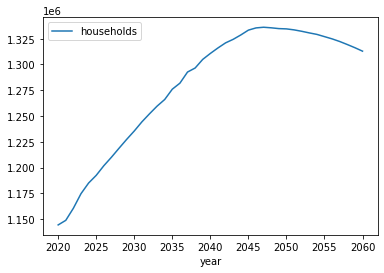

In [22]:
v4_kids[['year', 'households']].groupby('year').sum().plot.line()

<AxesSubplot:xlabel='year'>

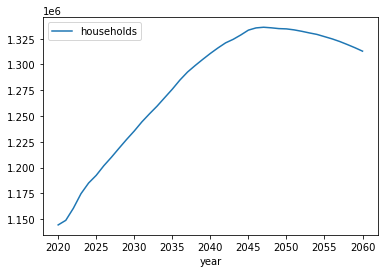

In [23]:
v5_kids[['year', 'households']].groupby('year').sum().plot.line()

# 13. Households with and without senior  

Compare forecast and distribution with version 2 

In [24]:
# v4 seniors distribution
v4_seniors = v4[['year', 'AnySenior', 'race', 'households']]\
            .groupby(['year', 'race'])\
            .sum()\
            .reset_index()
v4_seniors['NoSenior'] = v4_seniors['households'] - v4_seniors['AnySenior']
v4_seniors['AnySeniorPct'] = (v4_seniors['AnySenior']/v4_seniors['households'])*100
v4_seniors['NoSeniorPct'] = (v4_seniors['NoSenior']/v4_seniors['households'])*100
v4_seniors

,year,race,AnySenior,households,NoSenior,AnySeniorPct,NoSeniorPct
0,2020,AIAN_NH,1616,4583,2967,35.260746,64.739254
1,2020,Asian_NH,37616,129286,91670,29.095184,70.904816
2,2020,Black_NH,13282,54617,41335,24.318436,75.681564
3,2020,Hispanic,63294,298604,235310,21.196635,78.803365
4,2020,Multi-Race NH,7888,43912,36024,17.963199,82.036801
...,...,...,...,...,...,...,...
282,2060,Black_NH,15476,54455,38979,28.419796,71.580204
283,2060,Hispanic,137444,392122,254678,35.051336,64.948664
284,2060,Multi-Race NH,19808,63839,44031,31.028055,68.971945
285,2060,NHPI_NH,2480,5521,3041,44.919399,55.080601


In [25]:
# v5 seniors distribution
v5_seniors = household_char[['year', 'AnySenior', 'race', 'households']]\
            .groupby(['year', 'race'])\
            .sum()\
            .reset_index()
v5_seniors['NoSenior'] = v5_seniors['households'] - v5_seniors['AnySenior']
v5_seniors['AnySeniorPct'] = (v5_seniors['AnySenior']/v5_seniors['households'])*100
v5_seniors['NoSeniorPct'] = (v5_seniors['NoSenior']/v5_seniors['households'])*100
v5_seniors

,year,race,AnySenior,households,NoSenior,AnySeniorPct,NoSeniorPct
0,2020,AIAN_NH,1616,4583,2967,35.260746,64.739254
1,2020,Asian_NH,37616,129286,91670,29.095184,70.904816
2,2020,Black_NH,13282,54617,41335,24.318436,75.681564
3,2020,Hispanic,63294,298604,235310,21.196635,78.803365
4,2020,Multi-Race NH,7888,43912,36024,17.963199,82.036801
...,...,...,...,...,...,...,...
282,2060,Black_NH,15476,54455,38979,28.419796,71.580204
283,2060,Hispanic,137444,392122,254678,35.051336,64.948664
284,2060,Multi-Race NH,19808,63839,44031,31.028055,68.971945
285,2060,NHPI_NH,2480,5521,3041,44.919399,55.080601


In [26]:
v5_v4_diff = (v5_seniors.set_index(['year', 'race'])-v4_seniors.set_index(['year', 'race'])).reset_index()
v5_v4_diff

,year,race,AnySenior,households,NoSenior,AnySeniorPct,NoSeniorPct
0,2020,AIAN_NH,0,0,0,0.0,0.0
1,2020,Asian_NH,0,0,0,0.0,0.0
2,2020,Black_NH,0,0,0,0.0,0.0
3,2020,Hispanic,0,0,0,0.0,0.0
4,2020,Multi-Race NH,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...
282,2060,Black_NH,0,0,0,0.0,0.0
283,2060,Hispanic,0,0,0,0.0,0.0
284,2060,Multi-Race NH,0,0,0,0.0,0.0
285,2060,NHPI_NH,0,0,0,0.0,0.0


In [27]:
v5_v4_diff['versionDiff'] = (v5_seniors['households']-v4_seniors['households'])/v4_seniors['households']*100
v5_v4_diff[v5_v4_diff['versionDiff']!=0]

,year,race,AnySenior,households,NoSenior,AnySeniorPct,NoSeniorPct,versionDiff
98,2034,AIAN_NH,2,29,27,-0.220732,0.220732,0.550285
99,2034,Asian_NH,-103,-78,25,-0.044374,0.044374,-0.044901
100,2034,Black_NH,5,122,117,-0.060491,0.060491,0.221661
101,2034,Hispanic,49,650,601,-0.038965,0.038965,0.180799
102,2034,Multi-Race NH,17,74,57,-0.001048,0.001048,0.133608
103,2034,NHPI_NH,2,15,13,-0.060797,0.060797,0.324114
104,2034,White_NH,279,1012,733,-0.026715,0.026715,0.165240
112,2036,AIAN_NH,-4,42,46,-0.438737,0.438737,0.784460
113,2036,Asian_NH,-173,-140,33,-0.070472,0.070472,-0.078313
114,2036,Black_NH,8,210,202,-0.105701,0.105701,0.379870


In [28]:
writer = pd.ExcelWriter(r'Version 5 Test 13 - Households with and without senior by race.xlsx', engine='xlsxwriter')
v5_seniors.to_excel(writer, sheet_name = 'v5', index=False)
v4_seniors.to_excel(writer, sheet_name = 'v4', index=False)
v5_v4_diff.to_excel(writer, sheet_name = 'v5-v4', index=False)
writer.save()

<AxesSubplot:xlabel='year'>

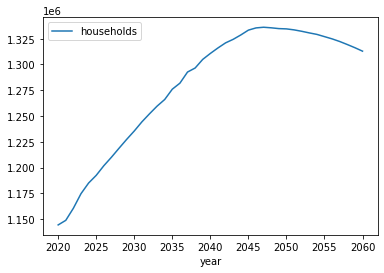

In [29]:
v4_seniors[['year', 'households']].groupby('year').sum().plot.line()

<AxesSubplot:xlabel='year'>

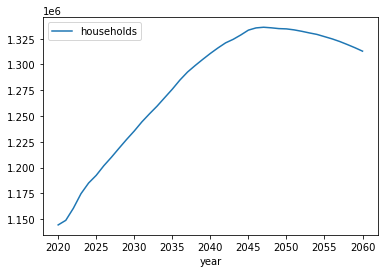

In [30]:
v5_seniors[['year', 'households']].groupby('year').sum().plot.line()